# DistMult

In [1]:
from util import *
import torch

/home/demir/anaconda3/envs/pDL/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
s = Value(1.3, label='s')
p = Value(0.9, label='p')
o = Value(1.4, label='o')
sp = s*p; sp.label = 'sp'
spo = sp * o; spo.label = 'spo'
yhat = spo.sigmoid(); yhat.label = 'yhat'
# prediction
yhat.data

0.837262613340254

## Wikipedia: Cross Entropy Loss $$ H(p,q) = - \sum_{x \in X }p(x) log q(x),$$

The cross-entropy between two probability distributions p and q over the same underlying set of events measures the average number of bits needed to identify an event drawn from the set if a coding scheme used for the set is optimized for an estimated probability distribution q, rather than the true distribution p.
https://en.wikipedia.org/wiki/Cross_entropy

### $$ H(y,\hat{y}) = -y\log(\hat{y}_i)-(1-y)\log(1-\hat{y}) $$
where $y, \hat{y} \in [0,1] $ 

# Gradient of BCE

###  $$ \frac{\partial H}{\partial \hat y} = \frac{\hat y - y}{\hat y (1-\hat y)}$$

In [3]:
def bce(y,yhat):
    loss=-y*math.log(yhat) - (1-y)* math.log(1-yhat)
    grad = (yhat -y) / (yhat * (1-yhat))
    return loss,grad

In [4]:
loss, grad = bce(y=0.0,yhat=yhat.data)
loss, grad

(1.8156175022194463, 6.144869476679113)

In [5]:
yhat.backward(grad)

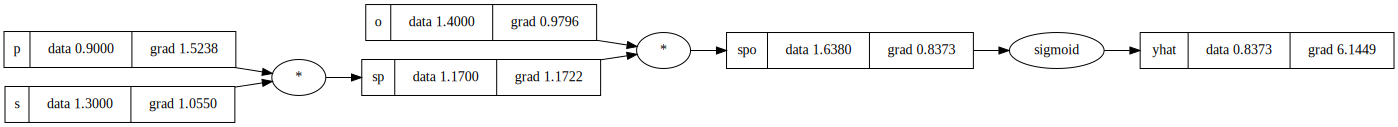

In [6]:
draw_dot(yhat)

# Sanity Checking with Pytorch

In [7]:
# Loss
print(bce(y=1.0,yhat=yhat.data))
def torch_checking_pos():
    # Torch Checking
    torch_yhat=torch.tensor(yhat.data,requires_grad=True)
    loss=torch.nn.functional.binary_cross_entropy(torch_yhat, torch.tensor(1.0))
    loss.backward()
    return loss.item(),torch_yhat.grad.item()
print(torch_checking_pos())

(0.17761750221944606, -1.1943683905943276)
(0.17761747539043427, -1.1943683624267578)


In [8]:
# Loss
print(bce(y=0.0,yhat=yhat.data))
def torch_checking_pos():
    # Torch Checking
    torch_yhat=torch.tensor(yhat.data,requires_grad=True)
    loss=torch.nn.functional.binary_cross_entropy(torch_yhat, torch.tensor(0.0))
    loss.backward()
    return loss.item(),torch_yhat.grad.item()
print(torch_checking_pos())

(1.8156175022194463, 6.144869476679113)
(1.815617561340332, 6.144869804382324)
